I'm sick of using pyspeckit, it doesnt seem particularly well written, and it's unnecesarily complicated, and it doesn't seem to play well with my python3 install

can I replace it with astropy functions?

In [3]:
from pyspeckit.spectrum.models.inherited_voigtfitter import voigt
import numpy as np

In [4]:
master_dat = np.loadtxt('sodium_spectrum.dat')
wvl = master_dat[:,0]
wvl = np.array(wvl)

In [5]:
x = [10, 5888, 10, 1]

In [6]:
amp = x[0]
line_cen = x[1]
fwhm = 0.4*abs(x[2])
ratio = abs(x[3])

Lfwhm = fwhm / (0.5346 + (0.2166 + (ratio**-2))**0.5)
Gfwhm = fwhm / (0.5346*ratio + (0.2166*ratio**2.0 + 1)**0.5)

In [7]:
line = voigt(wvl,amp,line_cen,Gfwhm,Lfwhm,normalized=False)

ps_line = amp*line/max(line)

In [8]:
import numpy as np
from astropy.modeling.models import Voigt1D
%matplotlib inline
import matplotlib.pyplot as plt


plt.figure()
v1 = Voigt1D(x_0=x[1], amplitude_L=amp, fwhm_L=Lfwhm, fwhm_G=Gfwhm)
ap_line =  v1(wvl)

ap_line = amp*ap_line/max(ap_line)


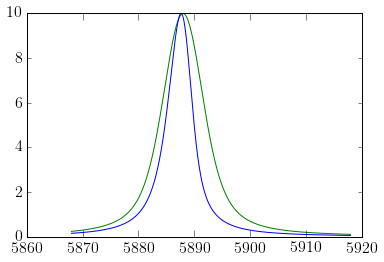

In [9]:
plt.plot(wvl,ps_line,'g')
plt.plot(wvl,ap_line,'b')
plt.show()

In [10]:
print wvl[np.argmax(ps_line)], wvl[np.argmax(ap_line)]

5888.0 5887.65


the astropy implementation is wrong

In [11]:
print wvl[np.argmax(ps_line)], wvl[np.argmax(ap_line)+35]

5888.0 5888.0


out by 35 !